In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Data Preprocessing Part 1

In [4]:
train.drop(columns=['Loan_ID'], inplace=True)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
check_missing = train.isnull().sum() * 100 / train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [6]:
train['Credit_History'].fillna(0, inplace=True)
train['Self_Employed'].fillna('No', inplace=True)
train['LoanAmount'].fillna(0, inplace=True)
train['Dependents'].fillna('Other', inplace=True)
train['Loan_Amount_Term'].fillna(0, inplace=True)
train['Gender'].fillna('Other', inplace=True)
train['Married'].fillna('Other', inplace=True)

In [7]:
check_missing = train.isnull().sum() * 100 / train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Exploratory Data Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

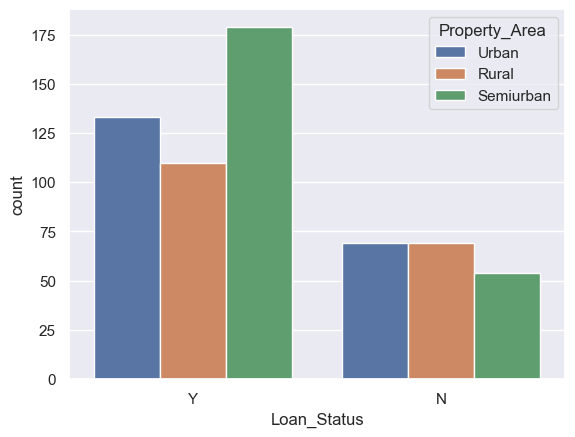

In [8]:
sns.countplot(data=train, x="Loan_Status", hue="Property_Area")
#People with Semiurban has high acceptable chance of Loan Status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

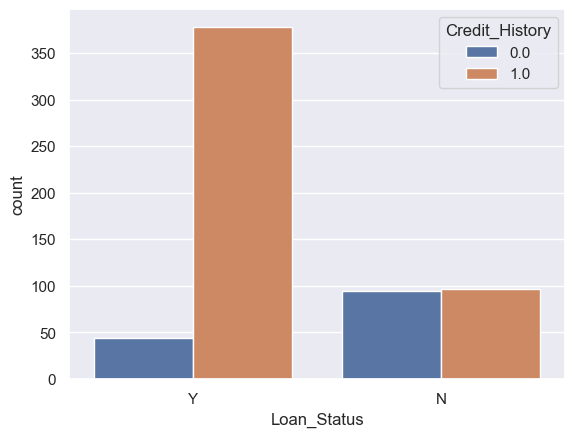

In [9]:
sns.countplot(data=train, x="Loan_Status", hue="Credit_History")
#People with acceptable past credit history are most likely accepted in new loan

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

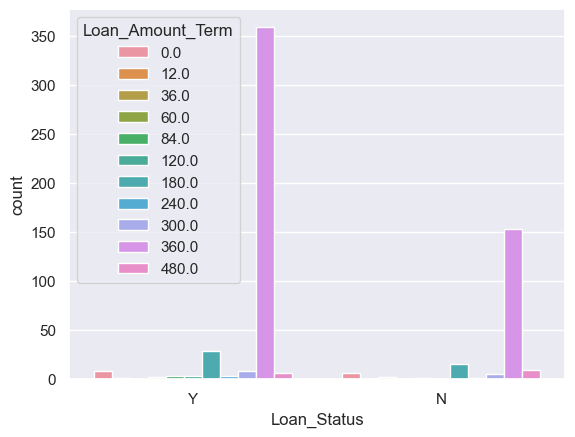

In [10]:
sns.countplot(data=train, x="Loan_Status", hue="Loan_Amount_Term")
#People with 360 month loan term are most likely to be acceptable

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

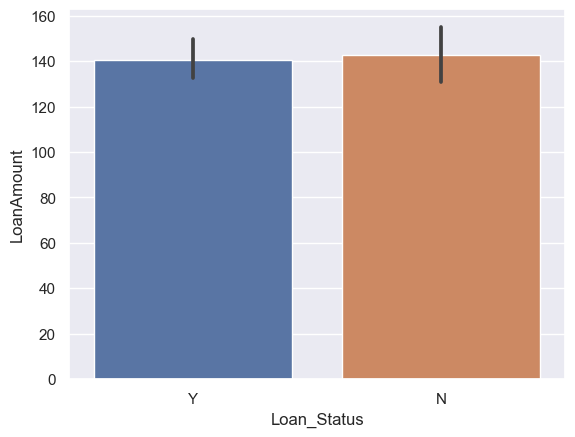

In [11]:
sns.barplot(data=train, x="Loan_Status", y="LoanAmount")

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

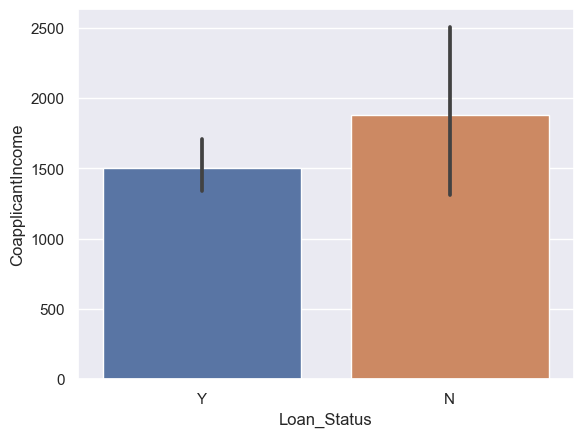

In [12]:
sns.barplot(data=train, x="Loan_Status", y="CoapplicantIncome")
#People with high CoapplicantIncome are most likely not accepted to the new loan

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

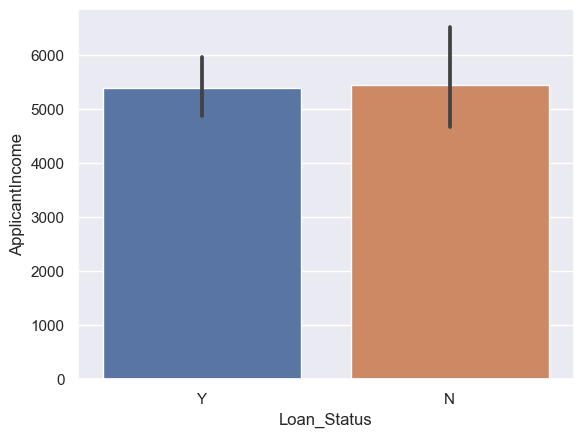

In [13]:
sns.barplot(data=train, x="Loan_Status", y="ApplicantIncome")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

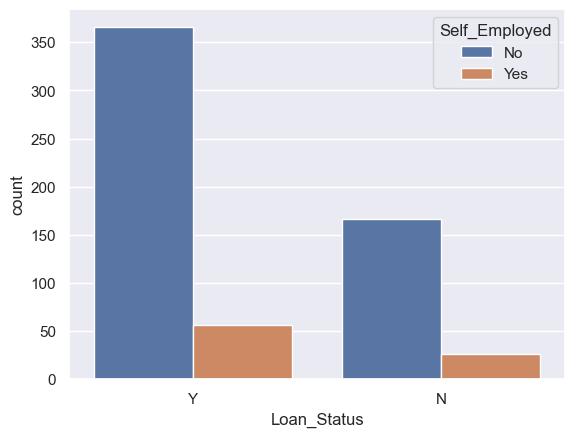

In [14]:
sns.countplot(data=train, x="Loan_Status", hue="Self_Employed")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

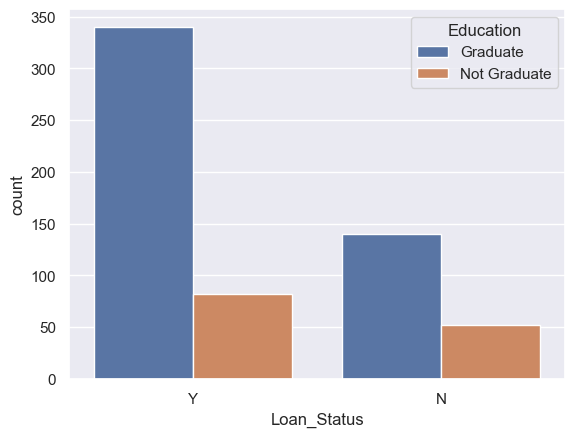

In [15]:
sns.countplot(data=train, x="Loan_Status", hue="Education")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

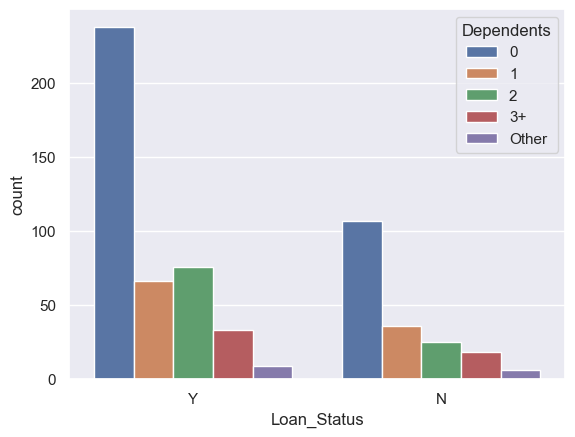

In [16]:
sns.countplot(data=train, x="Loan_Status", hue="Dependents")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

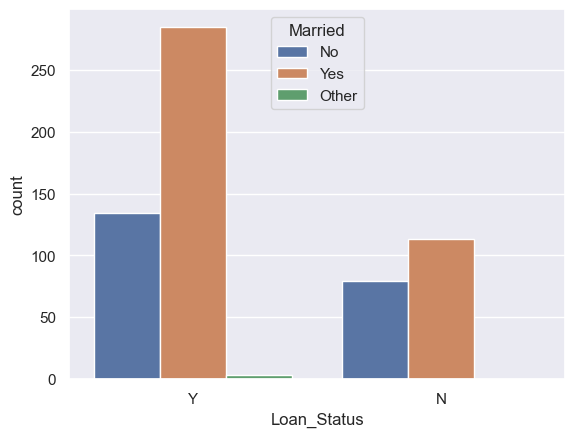

In [17]:
sns.countplot(data=train, x="Loan_Status", hue="Married")
#People that Married are more acceptable to request a new loan

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

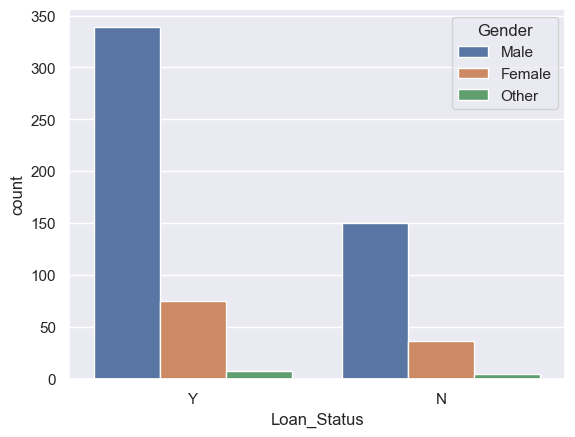

In [18]:
sns.countplot(data=train, x="Loan_Status", hue="Gender")

# Data Preprocessing Part 2

In [19]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
train['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [21]:
train['Married'].unique()

array(['No', 'Yes', 'Other'], dtype=object)

In [22]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', 'Other'], dtype=object)

In [23]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [26]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,   0., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Gender']= label_encoder.fit_transform(train['Gender'])
train['Gender'].unique()

array([1, 0, 2])

In [29]:
train['Married']= label_encoder.fit_transform(train['Married'])
train['Married'].unique()

array([0, 2, 1])

In [30]:
train['Dependents']= label_encoder.fit_transform(train['Dependents'])
train['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [31]:
train['Education']= label_encoder.fit_transform(train['Education'])
train['Education'].unique()

array([0, 1])

In [32]:
train['Self_Employed']= label_encoder.fit_transform(train['Self_Employed'])
train['Self_Employed'].unique()

array([0, 1])

In [33]:
train['Property_Area']= label_encoder.fit_transform(train['Property_Area'])
train['Property_Area'].unique()

array([2, 0, 1])

In [34]:
train['Loan_Amount_Term']= label_encoder.fit_transform(train['Loan_Amount_Term'])
train['Loan_Amount_Term'].unique()

array([ 9,  5,  7,  0,  6,  3,  8, 10,  2,  4,  1], dtype=int64)

In [35]:
train['Loan_Status']= label_encoder.fit_transform(train['Loan_Status'])
train['Loan_Status'].unique()

array([1, 0])

# Check The Outlier

<AxesSubplot:xlabel='ApplicantIncome'>

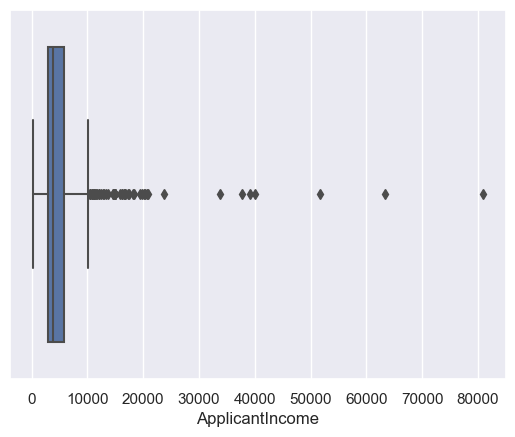

In [36]:
sns.boxplot(x=train["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

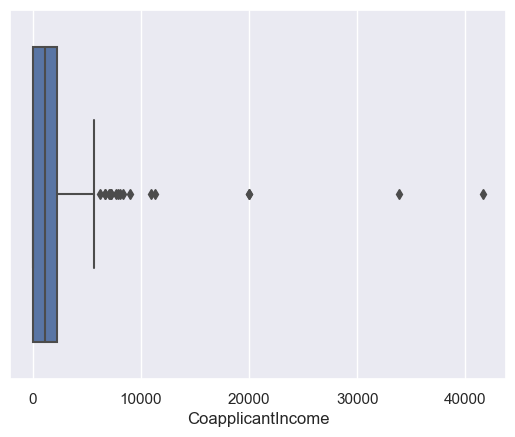

In [37]:
sns.boxplot(x=train["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

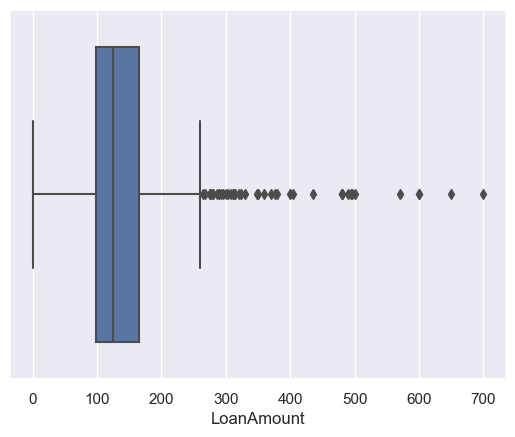

In [38]:
sns.boxplot(x=train["LoanAmount"])

In [39]:
import scipy.stats as stats
z = np.abs(stats.zscore(train))
data_clean = train[(z<3).all(axis = 1)] 
data_clean.shape

(572, 12)

# Balanced Class Data

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    398
0    174
Name: Loan_Status, dtype: int64

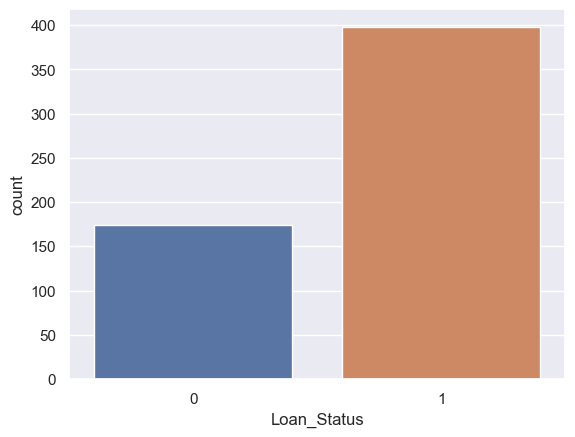

In [40]:
sns.countplot(data_clean['Loan_Status'])
data_clean['Loan_Status'].value_counts()

In [41]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_clean[(data_clean['Loan_Status']==1)] 
df_minority = data_clean[(data_clean['Loan_Status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 398, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    398
1    398
Name: Loan_Status, dtype: int64

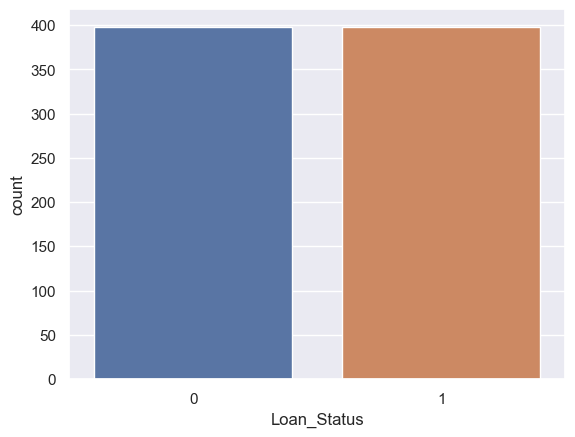

In [42]:
sns.countplot(df_upsampled['Loan_Status'])
df_upsampled['Loan_Status'].value_counts()

# Data Correlation

<AxesSubplot:>

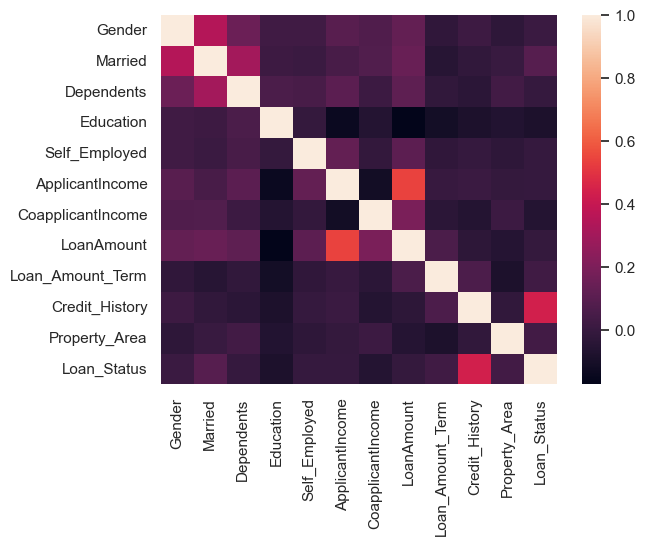

In [43]:
sns.heatmap(df_upsampled.corr(), fmt='.2g')

# Machine Learning Model Building

In [44]:
X = df_upsampled.drop('Loan_Status', axis=1)
y = df_upsampled['Loan_Status']

In [45]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

 # Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [47]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 61.79 %


In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7314285714285714
Precision Score :  0.7529411764705882
Recall Score :  0.7111111111111111


# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 74.8 %


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8287292817679559
Precision Score :  0.8241758241758241
Recall Score :  0.8333333333333334


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [53]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 79.67 %


In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8677248677248678
Precision Score :  0.8282828282828283
Recall Score :  0.9111111111111111


# Decision Tree Feature Importances

In [55]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
7,LoanAmount,0.208848
5,ApplicantIncome,0.196714
9,Credit_History,0.188194
6,CoapplicantIncome,0.148907
2,Dependents,0.055870
3,Education,0.050723
1,Married,0.040836
8,Loan_Amount_Term,0.035561
10,Property_Area,0.033897
0,Gender,0.025186


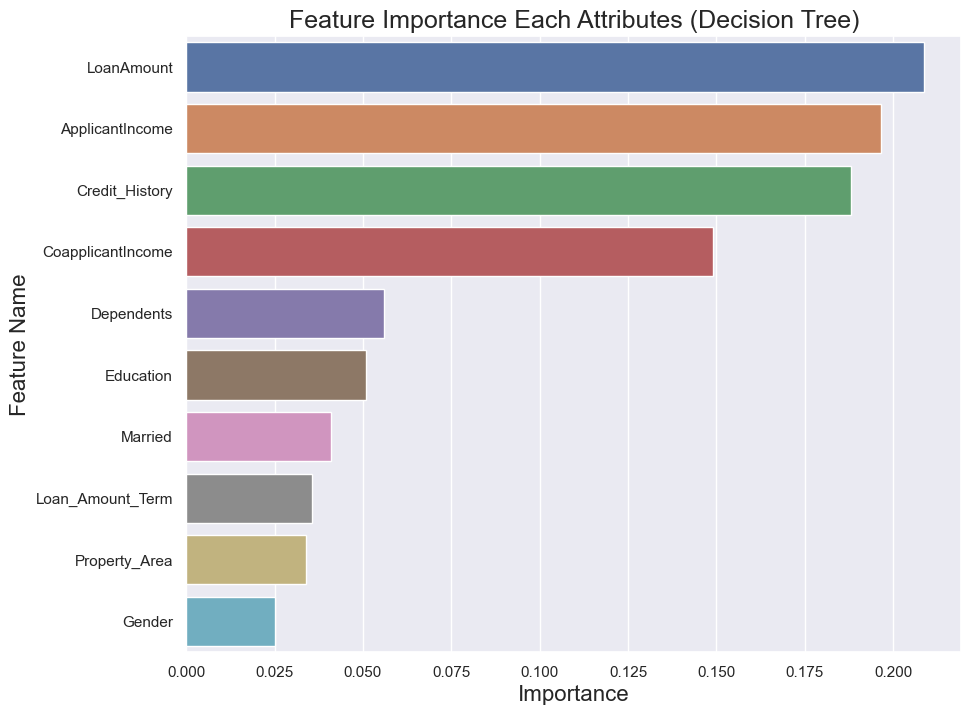

In [56]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Random Forest Feature Importances

In [57]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
5,ApplicantIncome,0.217521
7,LoanAmount,0.216110
9,Credit_History,0.176483
6,CoapplicantIncome,0.126380
2,Dependents,0.058595
10,Property_Area,0.051157
8,Loan_Amount_Term,0.043985
0,Gender,0.034534
3,Education,0.027188
1,Married,0.026270


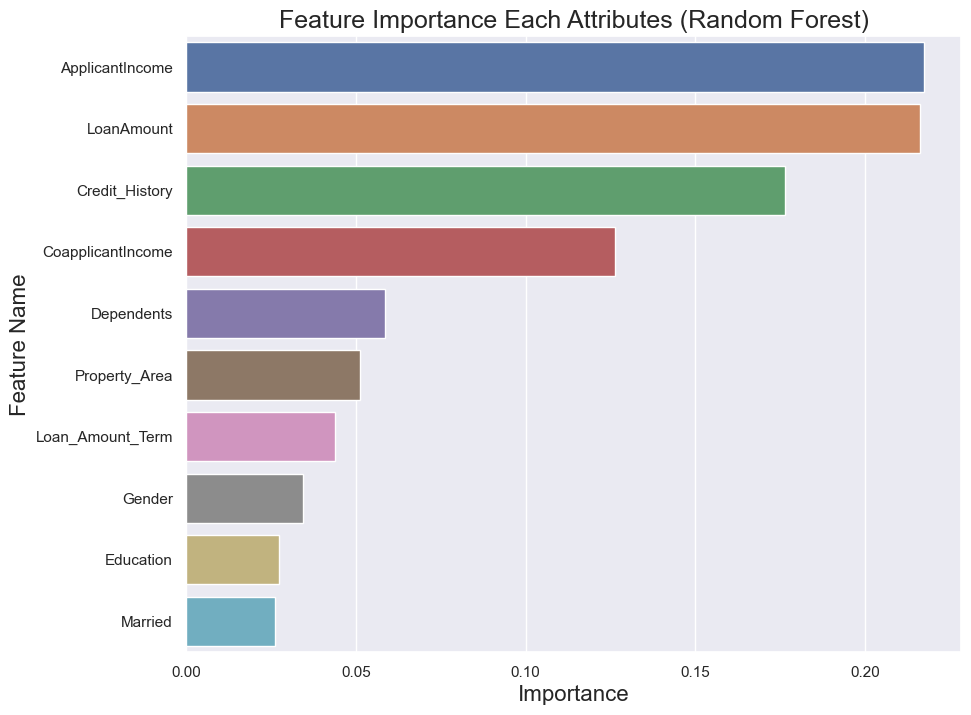

In [58]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Test File

In [59]:
check_missing = test.isnull().sum() * 100 / test.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      7.901907
Self_Employed       6.267030
Gender              2.997275
Dependents          2.724796
Loan_Amount_Term    1.634877
LoanAmount          1.362398
dtype: float64

In [60]:
test['Credit_History'].fillna(0, inplace=True)
test['Self_Employed'].fillna('No', inplace=True)
test['LoanAmount'].fillna(0, inplace=True)
test['Dependents'].fillna('Other', inplace=True)
test['Loan_Amount_Term'].fillna(0, inplace=True)
test['Gender'].fillna('Other', inplace=True)

In [61]:
test['Gender']= label_encoder.fit_transform(test['Gender'])
test['Gender'].unique()

array([1, 0, 2])

In [62]:
test['Married']= label_encoder.fit_transform(test['Married'])
test['Married'].unique()

array([1, 0])

In [63]:
test['Dependents']= label_encoder.fit_transform(test['Dependents'])
test['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [64]:
test['Education']= label_encoder.fit_transform(test['Education'])
test['Education'].unique()

array([0, 1])

In [65]:
test['Self_Employed']= label_encoder.fit_transform(test['Self_Employed'])
test['Self_Employed'].unique()

array([0, 1])

In [66]:
test['Property_Area']= label_encoder.fit_transform(test['Property_Area'])
test['Property_Area'].unique()

array([2, 1, 0])

In [67]:
test['Loan_Amount_Term']= label_encoder.fit_transform(test['Loan_Amount_Term'])
test['Loan_Amount_Term'].unique()

array([11,  8,  7,  0,  4, 12,  5,  2,  9, 10,  3,  6,  1], dtype=int64)

In [68]:
no = test[['Loan_ID']]
no.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [69]:
test_data = test.drop('Loan_ID', axis=1)

In [70]:
y_pred_prob = rfc.predict(test_data)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob)
y_pred_prob_df

,0
0,1
1,1
2,1
3,0
4,0
...,...
362,1
363,1
364,0
365,0


In [71]:
no['Loan_Status'] = y_pred_prob_df
no.head(20)

C:\Users\Michael\AppData\Local\Temp\ipykernel_26032\4219528891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no['Loan_Status'] = y_pred_prob_df


,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,0
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [72]:
no.dtypes

Loan_ID        object
Loan_Status     int32
dtype: object

In [73]:
no["Loan_Status"]=no["Loan_Status"].astype(str)
no.dtypes

C:\Users\Michael\AppData\Local\Temp\ipykernel_26032\3928728142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no["Loan_Status"]=no["Loan_Status"].astype(str)


Loan_ID        object
Loan_Status    object
dtype: object

In [74]:
no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('0', 'N')
no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('1', 'Y')
no['Loan_Status'].unique()

C:\Users\Michael\AppData\Local\Temp\ipykernel_26032\3293911733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('0', 'N')
C:\Users\Michael\AppData\Local\Temp\ipykernel_26032\3293911733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('1', 'Y')


array(['Y', 'N'], dtype=object)

In [75]:
no

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,N


In [76]:
no = no.set_index(['Loan_ID'])

In [77]:
no.to_csv('Loan_test.csv')